In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [115]:
data = pd.read_csv("Tweets.csv")

In [119]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [3]:
df = data[['text', 'airline_sentiment']]
sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
df['airline_sentiment'] = df['airline_sentiment'].map(sentiment_mapping)

/tmp/ipykernel_33/3275629589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['airline_sentiment'] = df['airline_sentiment'].map(sentiment_mapping)


In [4]:
df.iloc[5]

text                 @VirginAmerica seriously would pay $30 a fligh...
airline_sentiment                                                   -1
Name: 5, dtype: object

In [5]:
df['airline_sentiment'].value_counts()

airline_sentiment
-1    9178
 0    3099
 1    2363
Name: count, dtype: int64

# Text Preprocessing

In [8]:
import re
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642" 
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [9]:
def remove_links(text):
    link_pattern = r'https?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    clean_text = re.sub(link_pattern, '', text)
    
    return clean_text

In [10]:
def remove_contractions(text):
    contractions_dict = {
        "ain't": "am not",
        "aren't": "are not",
        "can't": "cannot",
        "can't've": "cannot have",
        "'cause": "because",
        "could've": "could have",
        "couldn't": "could not",
        "didn't": "did not",
        "doesn't": "does not",
        "don't": "do not",
        "hadn't": "had not",
        "hasn't": "has not",
        "haven't": "have not",
        "he'd": "he would",
        "he'll": "he will",
        "he's": "he is",
        "how'd": "how did",
        "how'll": "how will",
        "how's": "how is",
        "I'd": "I would",
        "I'll": "I will",
        "I'm": "I am",
        "I've": "I have",
        "isn't": "is not",
        "it'd": "it would",
        "it'll": "it will",
        "it's": "it is",
        "let's": "let us",
        "ma'am": "madam",
        "mayn't": "may not",
        "might've": "might have",
        "mightn't": "might not",
        "must've": "must have",
        "mustn't": "must not",
        "needn't": "need not",
        "oughtn't": "ought not",
        "shan't": "shall not",
        "sha'n't": "shall not",
        "she'd": "she would",
        "she'll": "she will",
        "she's": "she is",
        "should've": "should have",
        "shouldn't": "should not",
        "that's": "that is",
        "there'd": "there had",
        "there's": "there is",
        "they'd": "they would",
        "they'll": "they will",
        "they're": "they are",
        "they've": "they have",
        "wasn't": "was not",
        "we'd": "we would",
        "we'll": "we will",
        "we're": "we are",
        "we've": "we have",
        "weren't": "were not",
        "what'll": "what will",
        "what're": "what are",
        "what's": "what is",
        "what've": "what have",
        "where'd": "where did",
        "where's": "where is",
        "who'll": "who will",
        "who's": "who is",
        "won't": "will not",
        "wouldn't": "would not",
        "you'd": "you would",
        "you'll": "you will",
        "you're": "you are",
        "you've": "you have"
    }

    pattern = re.compile(r'\b(' + '|'.join(contractions_dict.keys()) + r')\b')
    
    expanded_text = pattern.sub(lambda match: contractions_dict[match.group(0)], text)
    
    return expanded_text


In [11]:
def remove_numbers(text):
    pattern = re.compile(r'\d+')
    text_without_numbers = pattern.sub('', text)
    
    return text_without_numbers

In [12]:
contractions = {
    "ain't", "aren't", "can't", "can't've", "could've", "couldn't", "didn't", "doesn't", "don't",
    "hadn't", "hasn't", "haven't", "he'd", "he'll", "he's", "how'd", "how'll", "how's", "I'd",
    "I'll", "I'm", "I've", "isn't", "it'd", "it'll", "it's", "let's", "ma'am", "mayn't", "might've",
    "mightn't", "must've", "mustn't", "needn't", "oughtn't", "shan't", "sha'n't", "she'd", "she'll",
    "she's", "should've", "shouldn't", "that'd", "that's", "there'd", "there's", "they'd", "they'll",
    "they're", "they've", "wasn't", "we'd", "we'll", "we're", "we've", "weren't", "what'll", "what're",
    "what's", "what've", "when's", "where'd", "where's", "where've", "who'll", "who's", "who've", "why's",
    "won't", "wouldn't", "you'd", "you'll", "you're", "you've"
}

In [13]:
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import emoji

sw_list = set(nltk.corpus.stopwords.words('english'))
sw_list.update({"i've", "i'm","u","n","w", "amp"})
def preprocess_text(text):
    text = re.sub(r'@[^\s]+|[\.!]+', '', text)
    text = remove_links(text)
    text = remove_emojis(text)
    text = text.replace('‘', '').replace('’', '').replace('“', '').replace('”', '')
    text = text.lower()
    text = remove_contractions(text)
    text = remove_numbers(text)
    #text = remove_misspelled_words(text)
    # Tokenize the text
    tokens = text.split()
    
    tokens = [token for token in tokens if token.lower() not in contractions]

    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in sw_list]

    # Lemmatization
    lemma = WordNetLemmatizer()
    tokens = [lemma.lemmatize(w, pos="v") for w in tokens]

    # Join tokens back into text
    tokens = " ".join(tokens)

    # Remove punctuation
    tokens = ''.join([char if char not in string.punctuation else ' ' for char in tokens])

    return tokens

In [14]:
df['text'] = df['text'].apply(preprocess_text)

/tmp/ipykernel_33/3458389446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(preprocess_text)


In [15]:
df

,text,airline_sentiment
0,say,0
1,plus add commercials experience tacky,1
2,today must mean need take another trip,0
3,really aggressive blast obnoxious entertainme...,-1
4,really big bad thing,-1
...,...,...
14635,thank get different flight chicago,1
14636,leave minutes late flight warn communication m...,-1
14637,please bring american airlines blackberry,0
14638,money change flight answer phone suggestions...,-1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14640 non-null  object
 1   airline_sentiment  14640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 228.9+ KB


In [17]:
def is_single_word(s):
    return len(s.split()) == 1

In [18]:
filtered_df = df[df['text'].apply(is_single_word)==True]
filtered_df

,text,airline_sentiment
0,say,0
14,thank,1
18,fly,1
46,dream,0
49,entertain,0
...,...,...
14196,go,0
14277,inch,0
14300,delayedwow,-1
14443,hi,0


In [19]:
rows_to_drop = filtered_df.index

In [20]:
df.drop(rows_to_drop, inplace=True)

/tmp/ipykernel_33/3194370517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(rows_to_drop, inplace=True)


In [21]:
df.head(20)

,text,airline_sentiment
1,plus add commercials experience tacky,1
2,today must mean need take another trip,0
3,really aggressive blast obnoxious entertainme...,-1
4,really big bad thing,-1
5,seriously would pay flight seat play really ...,-1
6,yes nearly every time fly vx ear worm wont go...,1
7,really miss prime opportunity men without hat ...,0
8,well not…but d,1
9,amazing arrive hour early good,1
10,know suicide second lead cause death among tee...,0


In [22]:
df[df["airline_sentiment"]==0]

,text,airline_sentiment
2,today must mean need take another trip,0
7,really miss prime opportunity men without hat ...,0
10,know suicide second lead cause death among tee...,0
23,make bos gt las non stop permanently anytime s...,0
27,miss me worry together soon,0
...,...,...
14607,need someone help,0
14611,guarantee retribution so i d glad share,0
14632,george look good please follow link start ref...,0
14637,please bring american airlines blackberry,0


In [23]:
df.head(20)

,text,airline_sentiment
1,plus add commercials experience tacky,1
2,today must mean need take another trip,0
3,really aggressive blast obnoxious entertainme...,-1
4,really big bad thing,-1
5,seriously would pay flight seat play really ...,-1
6,yes nearly every time fly vx ear worm wont go...,1
7,really miss prime opportunity men without hat ...,0
8,well not…but d,1
9,amazing arrive hour early good,1
10,know suicide second lead cause death among tee...,0


In [24]:
df["airline_sentiment"].value_counts()

airline_sentiment
-1    9098
 0    2937
 1    2198
Name: count, dtype: int64

In [25]:
df[df.duplicated()==True].head(10)

,text,airline_sentiment
111,getaway deal may one way lot cool cities c...,1
112,getaway deal may one way lot cool cities c...,0
373,add pillow instead lie flat seat first class a...,0
389,atlantic plough lone furrow middleeast,0
390,atlantic plough lone furrow middleeast,0
593,phone number cannot find call flight reservation,-1
1576,thank follow,1
1882,pls follow dm,0
2009,okay thank,0
2586,would love see girls inspire become pilots rt...,0


In [26]:
duplicate_texts = df[df.duplicated(subset=['text'], keep=False)]
duplicate_texts

,text,airline_sentiment
10,know suicide second lead cause death among tee...,0
59,new market song let us know think,0
98,phone number cannot find call flight reservation,-1
109,getaway deal may one way lot cool cities c...,1
110,getaway deal may one way lot cool cities c...,0
...,...,...
14512,neglect mention fee per ticket medical reaso...,-1
14529,mad love nyc,1
14543,reconsider usairways acquisition flight aa go...,-1
14544,neglect mention fee per ticket medical reaso...,-1


In [27]:
different_sentiments = duplicate_texts.groupby('text')['airline_sentiment'].nunique()
for text, count in different_sentiments.items():
    if count > 1:
        print("Text:", text)
        print(df[df['text'] == text][['text', 'airline_sentiment']])
        print()

Text: 
      text  airline_sentiment
781                         1
1644                       -1
2607                       -1
3509                        0
3987                        0
4612                        0
5460                        0
5658                        0
6295                       -1
6947                        0
7623                        0
10697                       1
10735                      -1
11286                      -1
11608                       0
11905                       0
12066                       0
12947                       0

Text:   
      text  airline_sentiment
6897                        0
11257                       1

Text:   keep aa air crew chief cousin alex espinosa dfw
                                                    text  airline_sentiment
11962    keep aa air crew chief cousin alex espinosa dfw                  0
12123    keep aa air crew chief cousin alex espinosa dfw                  1

Text:  airport snow removal method   

In [28]:
duplicate_texts = df[df.duplicated(subset=['text'], keep=False)]
different_sentiments = duplicate_texts.groupby('text')['airline_sentiment'].agg(lambda x: x.value_counts().idxmax())

indices_to_remove = []
for text, sentiment in different_sentiments.items():
    conflicting_indices = df[(df['text'] == text) & (df['airline_sentiment'] != sentiment)].index
    indices_to_remove.extend(conflicting_indices)

df = df.drop(indices_to_remove)

In [29]:
df["airline_sentiment"].value_counts()

airline_sentiment
-1    9079
 0    2919
 1    2190
Name: count, dtype: int64

In [30]:
df.shape

(14188, 2)

### Removing Blank columns

In [31]:
df[df.duplicated()==True].head(20)

,text,airline_sentiment
111,getaway deal may one way lot cool cities c...,1
373,add pillow instead lie flat seat first class a...,0
389,atlantic plough lone furrow middleeast,0
390,atlantic plough lone furrow middleeast,0
593,phone number cannot find call flight reservation,-1
1576,thank follow,1
1882,pls follow dm,0
2009,okay thank,0
2586,would love see girls inspire become pilots rt...,0
2924,dm send,0


In [32]:
blank_text_df = df[df["text"].str.strip() == ""]

In [33]:
len(blank_text_df)

13

In [34]:
df.drop(blank_text_df.index, inplace=True)

In [35]:
len(df)

14175

In [36]:
df[df.duplicated()==True].head(20)

,text,airline_sentiment
111,getaway deal may one way lot cool cities c...,1
373,add pillow instead lie flat seat first class a...,0
389,atlantic plough lone furrow middleeast,0
390,atlantic plough lone furrow middleeast,0
593,phone number cannot find call flight reservation,-1
1576,thank follow,1
1882,pls follow dm,0
2009,okay thank,0
2586,would love see girls inspire become pilots rt...,0
2924,dm send,0


### Word Cloud

In [37]:
negative_para = " ".join(df[df["airline_sentiment"] == -1]["text"])
pd.Series(negative_para.split()).value_counts().sort_values(ascending = False)

flight      3535
get         1507
cancel       910
delay        826
service      769
            ... 
cstmr          1
ctr            1
grossthe       1
navy           1
ky             1
Name: count, Length: 7936, dtype: int64

In [38]:
positive_para = " ".join(df[df["airline_sentiment"] == 1]["text"])
pd.Series(positive_para.split()).value_counts().sort_values(ascending = False)

thank           922
flight          443
get             252
great           232
service         162
               ... 
retweeted         1
friendlyteam      1
community         1
sorted            1
directly          1
Name: count, Length: 3410, dtype: int64

In [39]:
neutral_para = " ".join(df[df["airline_sentiment"] == 0]["text"])
pd.Series(neutral_para.split()).value_counts().sort_values(ascending = False)

flight        769
get           340
thank         190
need          183
please        178
             ... 
leeway          1
experts         1
xd              1
chilly          1
blackberry      1
Name: count, Length: 4141, dtype: int64

In [40]:
from wordcloud import WordCloud

In [41]:
wc = WordCloud( width=600,
    height=400,background_color='white', stopwords= [])

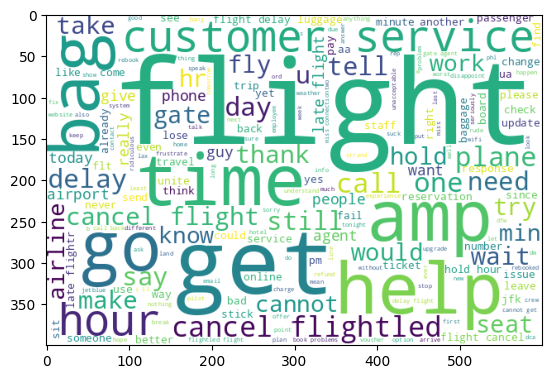

In [46]:
plt.imshow(wc.generate(negative_para))

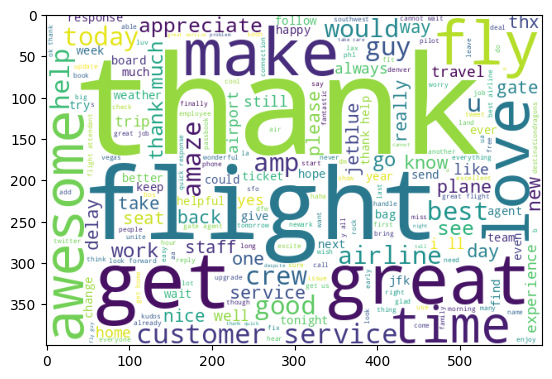

In [44]:
plt.imshow(wc.generate(positive_para))

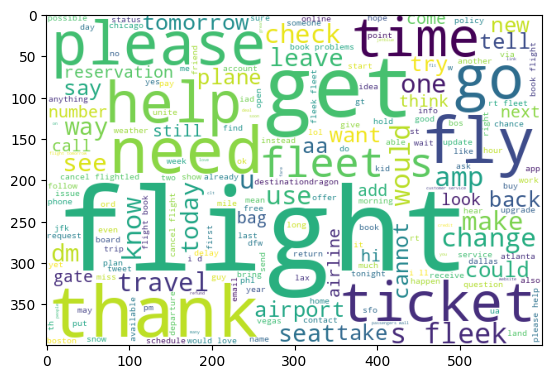

In [45]:
plt.imshow(wc.generate(neutral_para))

In [94]:
df[df["airline_sentiment"] == 0]["text"]

2                   today must mean need take another trip
7        really miss prime opportunity men without hat ...
10       know suicide second lead cause death among tee...
23       make bos gt las non stop permanently anytime s...
27                            miss me  worry together soon
                               ...                        
14607                                    need someone help
14611            guarantee retribution  so  i d glad share
14632    george  look good please follow link start ref...
14637           please bring american airlines  blackberry
14639    ppl need know many seat next flight plz put us...
Name: text, Length: 2906, dtype: object

# TFIDF Vectorizer

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(use_idf=True, lowercase=True)
X = tf_idf.fit_transform(df["text"]).toarray()

In [48]:
y = df["airline_sentiment"]

## Splitting train and test data

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

### Naive bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [51]:
y_pred_nb = nb_model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
test_accuracy1 = accuracy_score(y_test, y_pred_nb)
print("Test Accuracy Score::", test_accuracy1 * 100, " %")

Test Accuracy Score:: 46.64942393604514  %


In [53]:
y_pred_train_nb = nb_model.predict(X_train)
train_accuracy1 = accuracy_score(y_train, y_pred_train_nb)
print("Train Accuracy Score::", train_accuracy1 * 100, " %")

Train Accuracy Score:: 71.18524491030034  %


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

          -1       0.79      0.47      0.59      2696
           0       0.33      0.33      0.33       876
           1       0.24      0.62      0.35       681

    accuracy                           0.47      4253
   macro avg       0.45      0.47      0.42      4253
weighted avg       0.60      0.47      0.50      4253



In [55]:
from sklearn.metrics import roc_auc_score

roc_auc_nb_train = roc_auc_score(y_train, nb_model.predict_proba(X_train), multi_class='ovr')
roc_auc_nb_test = roc_auc_score(y_test, nb_model.predict_proba(X_test), multi_class='ovr')
print(roc_auc_nb_train, roc_auc_nb_test)


0.8308465655613283 0.6083049028058429


### LogisticRegression

In [56]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(max_iter=1000)
lor.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lor_reg = lor.predict(X_test)

In [57]:
y_pred_lor_reg

array([-1, -1, -1, ..., -1, -1, -1])

In [58]:
test_accuracy2 = accuracy_score(y_test, y_pred_lor_reg)
print("Test Accuracy Score::", test_accuracy2 * 100, " %")

Test Accuracy Score:: 77.35715965201034  %


In [59]:
y_pred_train_lr = lor.predict(X_train)
train_accuracy2 = accuracy_score(y_train, y_pred_train_lr)
print("Train Accuracy Score::", train_accuracy2 * 100, " %")

Train Accuracy Score:: 86.82725257004637  %


In [60]:
print(classification_report(y_test, y_pred_lor_reg))

              precision    recall  f1-score   support

          -1       0.78      0.95      0.86      2696
           0       0.66      0.42      0.51       876
           1       0.84      0.54      0.66       681

    accuracy                           0.77      4253
   macro avg       0.76      0.64      0.68      4253
weighted avg       0.77      0.77      0.75      4253



In [61]:
roc_auc_lor_train = roc_auc_score(y_train, lor.predict_proba(X_train), multi_class='ovr')
roc_auc_lor_test = roc_auc_score(y_test, lor.predict_proba(X_test), multi_class='ovr')
print(roc_auc_lor_train, roc_auc_lor_test)

0.9623187441597504 0.8888258156211523


### RandomForest 

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_rf = rf_classifier.predict(X_test)

In [72]:
test_accuracy3 = accuracy_score(y_test, y_pred_rf)
print("Test Accuracy Score::", test_accuracy3 * 100, " %")

Test Accuracy Score:: 75.54667293675053  %


In [73]:
y_pred_train_rf = rf_classifier.predict(X_train)
train_accuracy3 = accuracy_score(y_train, y_pred_train_rf)
print("Train Accuracy Score::", train_accuracy3 * 100, " %")

Train Accuracy Score:: 99.96976416045152  %


In [74]:
roc_auc_rf_train = roc_auc_score(y_train, rf_classifier.predict_proba(X_train), multi_class='ovr')
roc_auc_rf_test = roc_auc_score(y_test, rf_classifier.predict_proba(X_test), multi_class='ovr')
print(roc_auc_rf_train, roc_auc_rf_test)

0.9999296971260162 0.8674669017086506


In [139]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

          -1       0.76      0.96      0.85      2696
           0       0.70      0.34      0.46       876
           1       0.80      0.50      0.61       681

    accuracy                           0.76      4253
   macro avg       0.75      0.60      0.64      4253
weighted avg       0.75      0.76      0.73      4253



### SVM

In [62]:
from sklearn.svm import SVC
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_svm = svm_classifier.predict(X_test)


In [64]:
test_accuracy4 = accuracy_score(y_test, y_pred_svm)
print("Test Accuracy Score::", test_accuracy4 * 100, " %")

Test Accuracy Score:: 76.15800611333177  %


In [65]:
y_pred_train_svm= svm_classifier.predict(X_train)
test_accuracy4 = accuracy_score(y_train, y_pred_train_svm)
print("Train Accuracy Score::", test_accuracy4 * 100, " %")

Train Accuracy Score:: 95.7065107841161  %


In [140]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

          -1       0.75      0.97      0.85      2696
           0       0.74      0.32      0.45       876
           1       0.85      0.51      0.64       681

    accuracy                           0.76      4253
   macro avg       0.78      0.60      0.64      4253
weighted avg       0.77      0.76      0.73      4253



### Adaboost

In [75]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_classifier = DecisionTreeClassifier(max_depth=2)

adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, learning_rate=1)

adaboost_classifier.fit(X_train, y_train)

y_pred_adaboost = adaboost_classifier.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [76]:
y_pred_adaboost

array([-1, -1, -1, ..., -1, -1,  0])

In [77]:
np.unique(y_pred_adaboost)

array([-1,  0,  1])

In [78]:
test_accuracy5 = accuracy_score(y_test, y_pred_adaboost)
print("Test Accuracy Score::", test_accuracy5 * 100, " %")

Test Accuracy Score:: 72.13731483658594  %


In [79]:
y_pred_train_adb = adaboost_classifier.predict(X_train)
train_accuracy5 = accuracy_score(y_train, y_pred_train_adb)
print("Train Accuracy Score::", train_accuracy5 * 100, " %")

Train Accuracy Score:: 74.81354565611773  %


In [80]:
roc_auc_adb_train = roc_auc_score(y_train, adaboost_classifier.predict_proba(X_train), multi_class='ovr')
roc_auc_adb_test = roc_auc_score(y_test, adaboost_classifier.predict_proba(X_test), multi_class='ovr')
print(roc_auc_adb_train, roc_auc_adb_test)

0.8312734773085181 0.7987159071253004


In [141]:
print(classification_report(y_test, y_pred_adaboost))

              precision    recall  f1-score   support

          -1       0.73      0.94      0.82      2696
           0       0.56      0.16      0.25       876
           1       0.72      0.59      0.65       681

    accuracy                           0.72      4253
   macro avg       0.67      0.56      0.57      4253
weighted avg       0.70      0.72      0.68      4253



### Confusion Matrix 

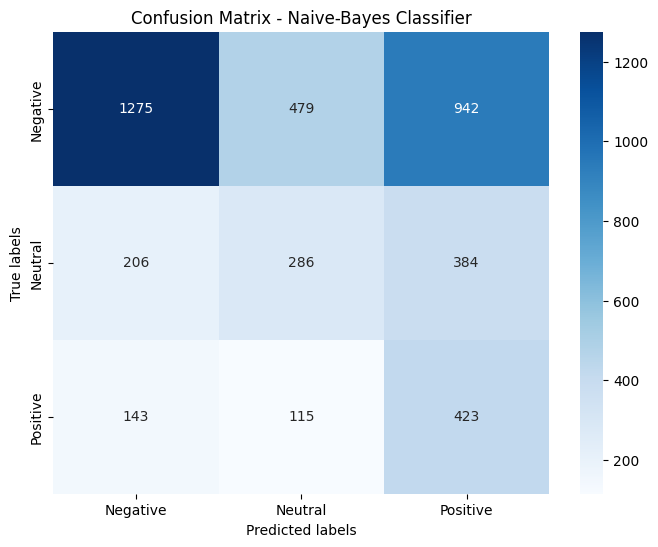

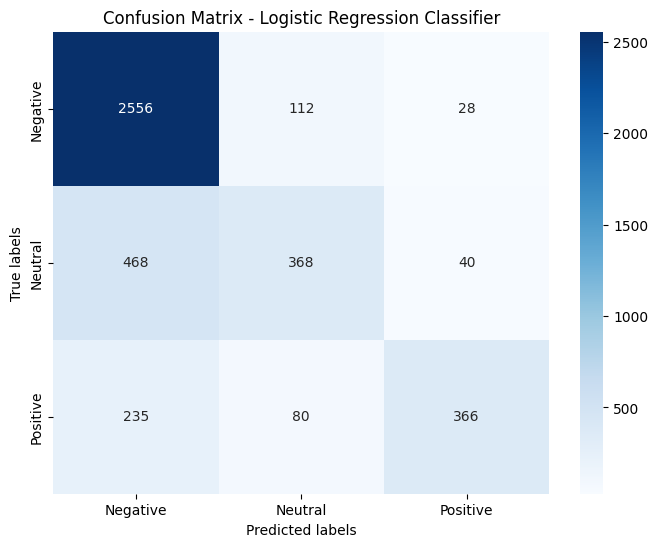

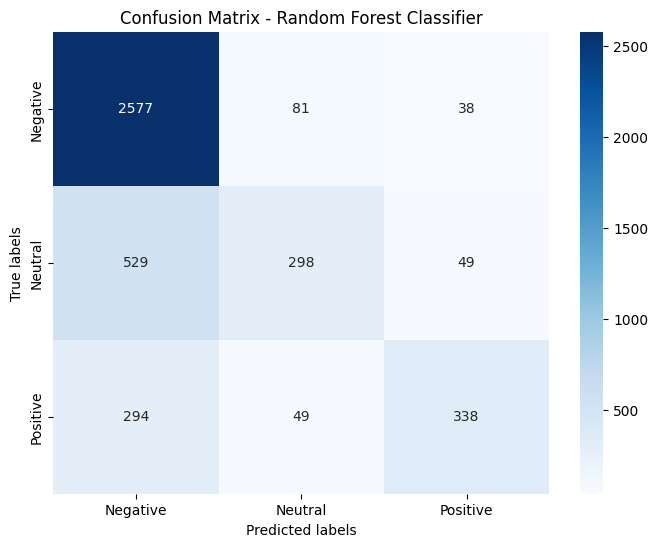

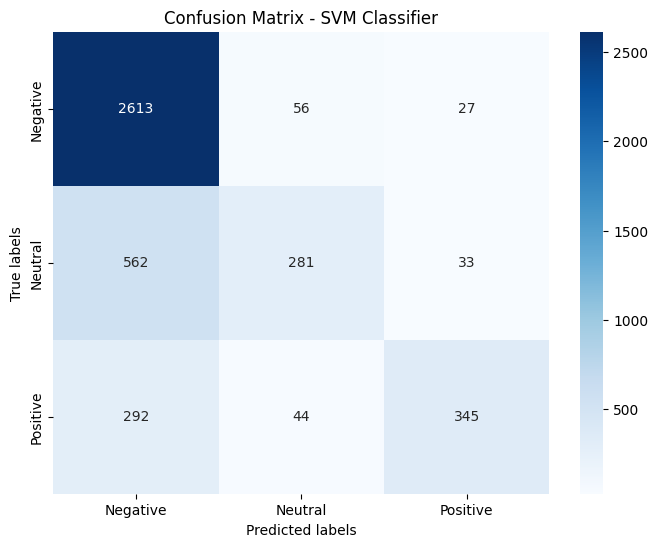

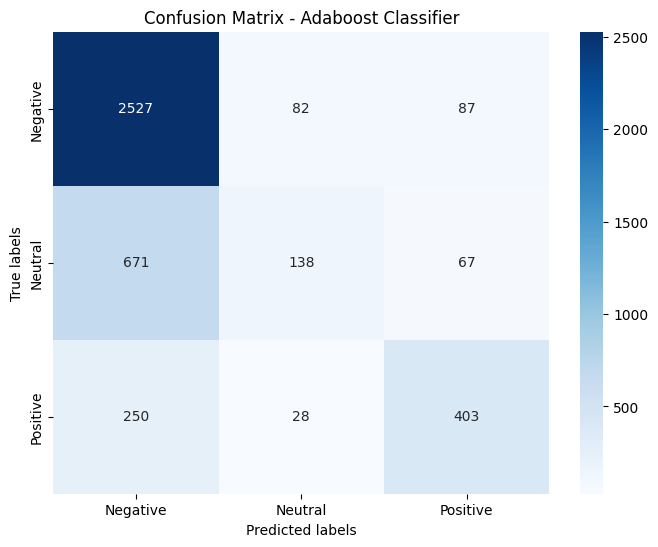

In [132]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title)
    plt.show()

predictions = [y_pred_nb,y_pred_lor_reg, y_pred_rf, y_pred_svm,y_pred_adaboost]  
model_names = ['Naive-Bayes', 'Logistic Regression', 'Random Forest', 'SVM', 'Adaboost']  

for pred, name in zip(predictions, model_names):
    cm = confusion_matrix(y_test, pred)
    plot_confusion_matrix(cm, labels=['Negative', 'Neutral', 'Positive'], 
                          title=f'Confusion Matrix - {name} Classifier')


In [68]:
svm_classifier.classes_

array([-1,  0,  1])

### Real time Prediction

In [130]:
r = "it was ok"
r = preprocess_text(r)
r = tf_idf.transform([r]).toarray()
prediction1 = adaboost_classifier.predict(r)
prediction2 = rf_classifier.predict(r)
prediction3 = svm_classifier.predict(r)
prediction4 = lor.predict(r)
prediction5 = nb_model.predict(r)
sentiment = {-1: "Negative", 0: "Neutral", 1: "Positive"}
print(sentiment[prediction1[0]])
print(sentiment[prediction2[0]])
print(sentiment[prediction3[0]])
print(sentiment[prediction4[0]])
print(sentiment[prediction5[0]])

Negative
Neutral
Neutral
Neutral
Positive


In [136]:
import pickle

# Save TF-IDF vectorizer
with open('tf_idf.pkl', 'wb') as f:
    pickle.dump(tf_idf, f)

# Save machine learning models
with open('adaboost_model.pkl', 'wb') as f:
    pickle.dump(adaboost_classifier, f)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)
    
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(svm_classifier, f)

with open('lor_model.pkl', 'wb') as f:
    pickle.dump(lor, f)

with open('nb_model.pkl', 'wb') as f:
    pickle.dump(nb_model, f)


In [138]:
import pickle

# Load TF-IDF vectorizer
with open('tf_idf.pkl', 'rb') as f:
    tf_idf = pickle.load(f)

# Load machine learning models
with open('adaboost_model.pkl', 'rb') as f:
    adaboost_classifier = pickle.load(f)

with open('rf_model.pkl', 'rb') as f:
    rf_classifier = pickle.load(f)
    
with open('svm_model.pkl', 'rb') as f:
    svm_classifier = pickle.load(f)

with open('lor_model.pkl', 'rb') as f:
    lor = pickle.load(f)

with open('nb_model.pkl', 'rb') as f:
    nb_model = pickle.load(f)

test_string = "This flight was great. The service was excellent and the crew was very friendly."

test_string = preprocess_text(test_string)
sentiment = {-1: "Negative", 0: "Neutral", 1: "Positive"}

test_vector = tf_idf.transform([test_string]).toarray()
prediction_adaboost = adaboost_classifier.predict(test_vector)
prediction_rf = rf_classifier.predict(test_vector)
prediction_svm = svm_classifier.predict(test_vector)
prediction_lor = lor.predict(test_vector)
prediction_nb = nb_model.predict(test_vector)

print("AdaBoost Classifier Prediction:", sentiment[prediction_adaboost[0]])
print("Random Forest Classifier Prediction:", sentiment[prediction_rf[0]])
print("SVM Classifier Prediction:", sentiment[prediction_svm[0]])
print("Logistic Regression Classifier Prediction:", sentiment[prediction_lor[0]])
print("Naive Bayes Classifier Prediction:", sentiment[prediction_nb[0]])


AdaBoost Classifier Prediction: Positive
Random Forest Classifier Prediction: Positive
SVM Classifier Prediction: Positive
Logistic Regression Classifier Prediction: Positive
Naive Bayes Classifier Prediction: Positive
